神经网络的学习：从训练数据中自动获取最优权重参数的过程。

倒入损失函数这一指标，学习的目的就是以这个指标为基准，找出能使他的值达到最小的权重参数。

为了找出近可能小的损失函数的值，将利用函数斜率的梯度法。

神经网络的特征：可以从数据中学习，由数据自动决定权重参数的值。

数据是机器学习的核心，数据驱动机器学习的执行过程。

训练数据（监督数据）和测试数据
原因是：
    1、模型的泛化能力：指模型在未见过的数据上的表现能力。获得泛化能力是机器学习的最终目标
    2、模型的过拟合：指模型在训练数据上表现很好，但是在未见过的数据上表现很差的情况。避免过拟合也是机器学习的重要课题。
    3、模型的欠拟合：指模型在训练数据上表现很差的情况。

1、使用训练数据进行学习，寻找最优权重参数。

2、使用测试数据评价训练得到模型的实际能力，评价指标是损失函数的值。

3、评价指标：

 损失函数：表示神经网络性能的“恶劣程度”，即当前的神经网络权重参数对于真实值的“距离”。
         
         即当前神经网络对监督数据在多大程度上的不拟合，多大程度上不一致，
         
         损失函数的值越小，说明当前神经网络对监督数据的拟合程度越好。

    1）均方误差：是指神经网络输出的结果与监督数据的差的平方的总和的平均值。
    2）交叉熵误差：是指神经网络输出的结果与监督数据的差的总和的平均值。
 均方误差和交叉熵误差都是损失函数，均方误差适用于连续数值的输出，交叉熵误差适用于离散的类别型数据。   

均方误差公式：
$$
E = \frac{1}{2}\sum_k(y_k - t_k)^2
$$

- 除以2的变体 ：
这样做的目的是使梯度计算时消除常数2，简化求导过程
- 实际应用中的选择 ：

- 两种方法在本质上没有区别，只是常数因子的差异
- 大多数深度学习框架默认使用标准公式（除以n）
- 如果您看到除以2的实现，通常是出于数学推导的便利

yk表示神经网络的输出，tk表示监督数据，k表示数据的维度


在数学计算中按道理均方误差公式为：
$$
E = \frac{1}{n}\sum_k(y_k - t_k)^2
$$

n为数据的个数
标准MSE公式

y=[0.1,0.05,0.6,0.0,0.05,0.1,0.1,0.1,0.0,0.0]

t=[0,0,1,0,0,0,0,0,0,0]   #one-hot表示
 
 数组元素的索引从第一个开始对应数字0，1，2....9，这里神经网络的输出y是softmax函数的输
 出，其中的数值可以理解为概率。t是监督数据，是正确解标签对应的数组，正确解标签是2，所以t
 [2]是1，其他都是0。



![image.png](learn-images/mse.png)

In [5]:
import numpy as np
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

#设2为正确解
t=[0,0,1,0,0,0,0,0,0,0]   #one-hot表示

#例1:“2”的概率最高的情况（0.6）
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

#例2:“2”的概率的情况（0.1）
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))


0.09750000000000003
0.5975


以上代码举了2个例子，第一个例子中，正确解是“2”，神经网络的输出最大值是“2”；

第二个例子中，正确解是“2”，神经网络的输出最大值是“7”。

发现第一个例子的损失函数值更小，和监督数据之间的误差更小，也就是说第一个例子的输出结果和监督数据更加吻合。

交叉熵误差公式：
$$
E = - \sum_k t_k \log y_k
$$
yk 是神经网络的输出，tk是正确解标签，k是数据维度。并且tk只有正确解标签索引为1，其他均为0（one-hot表示）

实际上只计算对应正确解标签的输出的自然对数，如假设正确解标签索引为2，与之对应的神经网络输出是0.6，则交叉熵误差为
$$
E = - \log 0.6 = 0.51
$$

正确解标签索引为2，对应的神经网络输出是0.1，则交叉熵误差为
$$
E = - \log 0.1 = 2.3
$$

也就是说，交叉熵误差的值由正确标签对应的输出结果决定。



In [6]:
def cross_entropy_error(y,t):
    delta=1e-7 # 一个微小值，防止出现log0的情况导致负无限大
    return -np.sum(t*np.log(y+delta))

#设2为正确解
t=[0,0,1,0,0,0,0,0,0,0]   #one-hot表示

#例1:“2”为正解标签对应输出（0.6）
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

#例2:“2”为正解标签对应输出 (0.1)
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


mini-batch学习

机器学习使用训练数据进行学习。也就是说针对训练数据计算损失函数的值，找出使该值尽可能小的参数。因此，计算损失函数必须将所有训练数据作为对象，就是说，训练数据有100个的话，要把这100个损失函数的总和作为学习的目标。

前面介绍的例子是针对单个数据的损失函数。如果要求所有训练数据的损失函数的总和作为学习的目标，该如何进行呢？

比如，有10000个训练数据，从10000个数据中随机选择100个数据，这100个数据称为mini-batch，mini-batch的损失函数就被作为学习的目标。

以交叉熵误差为例，mini-batch的损失函数如下式所示。

以交叉熵误差为例，mini-batch的损失函数如下式所示：
    $$
    E = - \frac{1}{N} \sum_{n \in N} \sum_{k \in K} t_k^{(n)} \log y_k^{(n)}
    $$

假设mini-batch 一次性计算3张图片，3张图片经过神经网络的输出为（3个分类）：
y1=[0.1,0.5,0.4]
y2=[0.3,0.1,0.6]
y3=[0.2,0.7,0.1]

#完全正解
y1=[0.1,0.4,0.5]
y2=[0.3,0.6,0.1]
y3=[0.2,0.1,0.7]    

假设mini-batch的正确解标签为：
t1=[0,0,1]
t2=[0,1,0]
t3=[0,0,1]




- 批量计算步骤 （针对3张图片）：

    -  对每张图片计算交叉熵 -单个样本的交叉熵公式进行计算
    -  对所有图片的交叉熵求平均

具体计算过程 ：

第一张图片(y1, t1) ：
L1 = -(0 log(0.1) + 0 log(0.5) + 1*log(0.5)) = -log(0.5) ≈ 0.916

第二张图片(y2, t2) ：
L2 = -(0 log(0.3) + 1 log(0.1) + 0*log(0.6)) = -log(0.1) ≈ 2.303

第三张图片(y3, t3) ：
L3 = -(0 log(0.2) + 0 log(0.7) + 1*log(0.1)) = -log(0.6) ≈ 2.303

Calculate the average cross-entropy loss:
(0.916 + 2.303 + 2.303) / 3 ≈ 1.841



把单个数据的损失函数扩大到了N份，最后还要除以N进行正规化，求单个数据的“平均损失函数”，可以获得和训练数据数量无关的统一指标。

In [25]:
#监督数据形式为one-hot
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

t=np.array([[0,0,1],[0,1,0],[0,0,1]])

y1=np.array([[0.1,0.5,0.4],[0.3,0.1,0.6],[0.2,0.7,0.1]])
y2=np.array([[0.5,0.1,0.4],[0.3,0.6,0.1],[0.2,0.1,0.7]])

print(cross_entropy_error(y1,t))
print(cross_entropy_error(y2,t))




1.8404862226210927
0.5945969133517081


np.log(y[np.arange(batch_size), t]) 这行代码使用了NumPy的高级索引技术，其工作原理如下：
抽出各个数据的正确解标签对应的神经网络的输出

1. 索引结构 ：
   
   - np.arange(batch_size) 生成一个从0到batch_size-1的数组，如[0,1,2,...,batch_size-1]
   - t 是包含每个样本正确类别索引的数组
2. 索引过程 ：
   
   - 假设 batch_size=3 , t=[2,1,0]
   - y[np.arange(3), [2,1,0]] 相当于同时执行：
     - y[0,2] (第一个样本的第3个类别概率)
     - y[1,1] (第二个样本的第2个类别概率)
     - y[2,0] (第三个样本的第1个类别概率)
3. 数学意义 ：
   
   - 这实现了对每个样本取其正确类别对应的预测概率
   - 然后对这些概率值取对数，用于交叉熵计算

In [40]:
import numpy as np

# 假设有3个样本，每个样本有3个类别的预测概率
y = np.array([
    [0.1, 0.2, 0.7],  # 样本1
    [0.3, 0.4, 0.3],  # 样本2
    [0.5, 0.1, 0.4]   # 样本3
])

# 每个样本的正确类别索引
t = np.array([2, 1, 0])  # 样本1的正确类别是2，样本2是1，样本3是0

# 高级索引操作
selected_probs = y[np.arange(3), t]  # 结果为 [0.7, 0.4, 0.5]
log_probs = np.log(selected_probs)  # 对正确类别的概率取对数

print("Selected probabilities:", selected_probs)
print("Log probabilities:", log_probs)

Selected probabilities: [0.7 0.4 0.5]
Log probabilities: [-0.35667494 -0.91629073 -0.69314718]


In [39]:
#监督数据为标签形式
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    
    #print(y[np.arange(batch_size), t])
    for i in range(len(y)):
        print(y[i])
        for j in range(len(y[i])):
            print("y[{},{}]={}".format(i,j,y[i][j]))
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
#假设batch_size为3,输出3个类别的数据标签为[2,7,9]
t=np.array([0,1,2])  #标签索引

y1=np.array([[0.1,0.5,0.4],[0.3,0.1,0.6],[0.2,0.7,0.1]])
y2=np.array([[0.5,0.1,0.4],[0.3,0.6,0.1],[0.2,0.1,0.7]])

y=[y1,y2]
for i in range(len(y)):
    print(cross_entropy_error(y[i],t))
     
    

[0.1 0.5 0.4]
y[0,0]=0.1
y[0,1]=0.5
y[0,2]=0.4
[0.3 0.1 0.6]
y[1,0]=0.3
y[1,1]=0.1
y[1,2]=0.6
[0.2 0.7 0.1]
y[2,0]=0.2
y[2,1]=0.7
y[2,2]=0.1
2.302584092994546
[0.5 0.1 0.4]
y[0,0]=0.5
y[0,1]=0.1
y[0,2]=0.4
[0.3 0.6 0.1]
y[1,0]=0.3
y[1,1]=0.6
y[1,2]=0.1
[0.2 0.1 0.7]
y[2,0]=0.2
y[2,1]=0.1
y[2,2]=0.7
0.5202157462469678


倒入损失函数的目的：在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数，这就需要寻找参数的导数（确切的讲是梯度），然后以这个导数为指引，逐步更新参数的值。

在神经网络的学习时，不能将识别精度做指标，因为如果以识别精度为指标，则参数的导数在绝大多数地方都会变为0.

识别精度对微小的参数变化基本上没什么反应，即使有反应，它的值也是不连续的，突然的变化，而如果把损失函数作为指标，稍微改变一下参数的值，对应的损失函数会发生微小的，连续性的变化。

sigmoid函数不仅函数输出值是连续变化的，曲线的斜率（导数）也是连续变化的，也就是说，sigmoid函数的导数在任何地方都不为0.这对神经网络的学习非常重要。得益于斜率不为0 的性质，神经网络的学习得以正确的进行。

数值微分

梯度法使用梯度的信息决定前进的方向

1、导数

导数：函数f(x)在x点的导数表示为f'(x)，导数是函数f(x)在x点的变化率，导数的定义如下：
x的微小变化将导致函数f(x)的值在多大程度上的变化，其中，h表示微小变化的距离，h无限趋近于0.

$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$  

In [ ]:
#不好的实现实例
def numerical_diff(f,x):  #数值微分英文：numerical differentiation
    h=10e-50
    return (f(x+h)-f(x))/h


以上代码有2处需要改进的地方

1、因为想把尽可能小的值赋值给h，所以这里用h=10e-50这个微小值，但是这样反而产生了舍入误差，所谓舍入误差，是指因省略小数的精细部分数值（比如小数点后第8位以后的数值）而造成最终计算结果上的误差。

    np.float32(1e-50)  #np.float32(0.0)

    如果用float32(32位浮点数)来表示1e-50，就会变成0.0，无法正确表示出来。也就是说使用过小的值会造成计算机出现计算上的问题，h改成10的-4次方就可以得到正确的结果。


2、“真的导数”对应函数在x处的斜率（切线），上述公式中计算的是（x+h）和(x)之间的斜率，因此真的导数和上述实现得到的导数的值严格意义上并不一致，这个差异的出现是因为h不可能无限接近0.

    为了减小这个误差，可以计算f在（x+h）和 （x-h）之间的差分
    
$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x-h)}{2h}
$$  
    

0.1999999999990898
0.2999999999986347


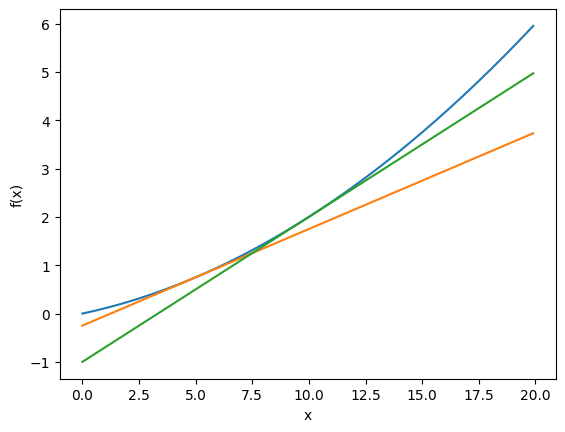

In [48]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf1 = tangent_line(function_1, 5)
tf2 = tangent_line(function_1, 10)

y1 = tf1(x)
y2 = tf2(x)

plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)

plt.show()


2、偏导数
f(x0,x1) = x0**2 + x1**2  
有2个变量，有多个变量的函数的导数称为偏导数，用数学表达式为：   



    


3、梯度

梯度：函数f(x,y)在点(x0,y0)处的梯度表示为(∇f)(x0,y0)，梯度是一个向量，它的方向是函数f(x,y)在点(x0,y0)处的最快上升方向，梯度的定义如下： 

$$
(∇f)(x0,y0) = \lim_{h \to 0} \frac{1}{h} \begin{pmatrix}
f(x0+h,y0) - f(x0,y0) \\
f(x0,y0+h) - f(x0,y0)
\end{pmatrix}
$$  




4、梯度的性质

梯度的性质：

- 梯度的方向是函数值上升最快的方向
- 梯度的大小表示函数值上升最快的速度

5、梯度法

梯度法：梯度法是一种常用的寻找函数最小值的方法，它的原理是：在函数f(x,y)的点(x0,y0)处，沿着梯度的反方向，即函数值下降最快的方向，移动一定的距离，得到新的点(x1,y1)，然后在新的点(x1,y1)处，沿着梯度的反方向移动一定的距离，得到新的点(x2,y2)，以此类推，直到函数值的变化量小于一定的阈值，或者达到了最大的迭代次数，就停止迭代，得到最小值的点。    

梯度法的步骤：

1、初始化：随机选择一个初始点(x0,y0)
2、计算梯度：计算函数f(x,y)在点(x0,y0)处的梯度(∇f)(x0,y0)
3、更新参数：将(x0,y0)沿着梯度的反方向移动一定的距离，得到新的点(x1,y1)
4、判断终止条件：如果函数值的变化量小于一定的阈值，或者达到了最大的迭代次数，就停止迭代，得到最小值的点；否则，回到第2步，继续迭代。